In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
test_df = pd.read_csv("~/real_estate/data/v9/test_df.csv")
train_df = pd.read_csv("~/real_estate/data/v9/train_df.csv")
train_df_adasyn = pd.read_csv("~/real_estate/data/v9/train_df_adasyn.csv")
train_df_smote = pd.read_csv("~/real_estate/data/v9/train_df_smote_ratio.csv")

features = train_df.columns[:-2]

X_test = test_df[features].values
X_train = train_df[features].values
X_train_adasyn = train_df_adasyn[features].values
X_train_smote = train_df_smote[features].values

y_test = test_df["target"].values
y_train = train_df["target"].values
y_train_adasyn = train_df_adasyn["target"].values
y_train_smote = train_df_smote["target"].values

### Train Linear Regressions

In [6]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
y_test_hat_1 = model_1.predict(X_test)
y_train_hat_1 = model_1.predict(X_train)
print("R^2 train: ", np.square(np.corrcoef(y_train, y_train_hat_1)[0,1]))
print("R^2 test: ", np.square(np.corrcoef(y_test, y_test_hat_1)[0,1]))

R^2 train:  0.34328957977333663
R^2 test:  0.2895254329644942


In [5]:
model_2 = LinearRegression()
model_2.fit(X_train_adasyn, y_train_adasyn)
y_test_hat_2 = model_2.predict(X_test)
y_train_hat_2 = model_2.predict(X_train_adasyn)
print("R^2 train: ", np.square(np.corrcoef(y_train_adasyn, y_train_hat_2)[0,1]))
print("R^2 test: ", np.square(np.corrcoef(y_test, y_test_hat_2)[0,1]))

R^2 train:  0.7722080847533165
R^2 test:  0.21945740605338662


In [6]:
model_3 = LinearRegression()
model_3.fit(X_train_smote, y_train_smote)
y_test_hat_3 = model_3.predict(X_test)
y_train_hat_3 = model_3.predict(X_train_smote)
print("R^2 train: ", np.square(np.corrcoef(y_train_smote, y_train_hat_3)[0,1]))
print("R^2 test: ", np.square(np.corrcoef(y_test, y_test_hat_3)[0,1]))

R^2 train:  0.7216192627479114
R^2 test:  0.22960130944038915


### Plot Results

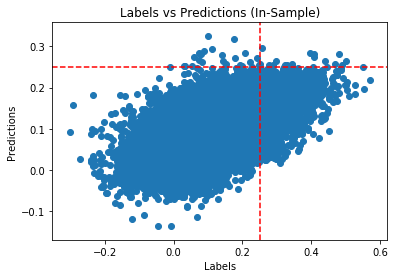

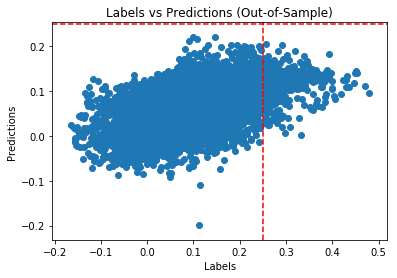

In [7]:
plt.scatter(y_train, y_train_hat_1)
plt.title("Labels vs Predictions (In-Sample)")
plt.ylabel("Predictions")
plt.xlabel("Labels")
plt.axvline(x=0.25, color="red", linestyle='--')
plt.axhline(y=0.25, color="r", linestyle='--')
plt.show()

plt.scatter(y_test, y_test_hat_1)
plt.title("Labels vs Predictions (Out-of-Sample)")
plt.ylabel("Predictions")
plt.xlabel("Labels")
plt.axvline(x=0.25, color="red", linestyle='--')
plt.axhline(y=0.25, color="r", linestyle='--')
plt.show()

In [8]:
predictive_df = pd.DataFrame({"label": y_test, "pred": y_test_hat_1})
predictive_df = predictive_df.sort_values(by=["pred"], ascending=False)

predictive_df_25 = predictive_df.loc[predictive_df["pred"] >= .25]
top_10_predictions = predictive_df.head(n=10)
top_25_predictions = predictive_df.head(n=25)

mean_return_over_25 = np.mean(predictive_df_25["label"].values)
mean_return_top_10_predictions = np.mean(top_10_predictions["label"].values)
mean_return_top_25_predictions = np.mean(top_25_predictions["label"].values)

print("Mean return for predictions above 25%: ", mean_return_over_25)
print("Mean return for top 10 predictions: ", mean_return_top_10_predictions)
print("Mean return for top 25 predictions: ", mean_return_top_25_predictions)

Mean return for predictions above 25%:  nan
Mean return for top 10 predictions:  0.1739482188438985
Mean return for top 25 predictions:  0.19387167229866797


/home/gnazareths/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/gnazareths/.local/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Get Coefficients

In [8]:
model = sm.OLS(y_train, X_train)
model = model.fit()

coefficients = model.params
standard_errors = model.HC0_se

regression_table = pd.DataFrame({"coefficients":coefficients, 
                                 "standard_errors":standard_errors,
                                 "t-statistics":coefficients/standard_errors}, index=features)

In [9]:
regression_table

,coefficients,standard_errors,t-statistics
year,-0.856849,0.053052,-16.151158
month,-0.262245,0.016074,-16.314515
90_day_treasury_bill_rate,0.016493,0.002653,6.216875
mean_adjusted_income_lag_log,0.149257,0.012306,12.129261
mean_adjusted_income_with_dep_lag_log,-0.211406,0.011697,-18.073909
mean_fixed_mortgage_rate,-0.007222,0.002790,-2.588450
mean_hourly_earnings_adj,0.150195,0.043788,3.430050
mean_mortgage_interest_hh_lag_log,0.012533,0.003563,3.517053
mean_real_estate_taxes_hh_lag_log,0.006183,0.003610,1.712976
median_sqft_value_log,0.118190,0.006653,17.765226
